# Project 44: Simulating the Izhikevich spiking neuron model using the Brian2 software

## Authors: Julen Etxaniz and Ibon Urbina

## Subject: Machine Learning and Neural Networks

## Date: 22/11/2020

## Objective: The goal of the project is to implement the Izhikevich’s model using the Brian2 Python library https://brian2.readthedocs.io/en/stable/.

## Contents
### 1. Importing the libraries
### 2. Defining the model
### 3. Interacting with the model
### 4. Neuron Types
### 5. Neuron Features
### 6. Defining the simulation
### 7. Running the simulation

# 1. Importing the libraries

In [1]:
%matplotlib inline
from brian2 import *
import ipywidgets as ipw

# 2. Defining the model
https://www.izhikevich.org/publications/spikes.htm

<figure>
  <img src="model.png" alt="Neuron Model">
  <figcaption>Figure 1. Neuron Model. Electronic version of the figure and reproduction permissions are freely available at <a href="http://www.izhikevich.com">http://www.izhikevich.com</a></figcaption>
</figure>

In [183]:
def model(a=0.02, b=0.2, c=-65, d=2, fI='int(t>200*ms)*10', V=-65, tau=1/0.1, duration=2000):
    # Parameters
    tau = tau*ms
    duration = duration*ms
    
    # Simulation
    # We added int(t>duration/10) to make v and u constant at the start when I=0
    eqs = '''
    dv/dt = int(t>duration/10)*(0.04*v**2+5*v+140-u+I)/tau : 1
    du/dt = int(t>duration/10)*(a*(b*v-u))/tau : 1
    I : 1
    '''
    G = NeuronGroup(1, eqs, threshold='v>=30', reset='v=c; u+=d', method='euler')
    G.v = V
    G.u = b*V
    
    M = StateMonitor(G, ('v', 'u', 'I'), record=0)
    
    @network_operation(dt=tau)
    def change_I():
        G.I = fI
    
    run(duration)
   
    # Plotting
    plot(M.t/ms, M.v[0], label='v')
    plot(M.t/ms, M.u[0], label='u')
    plot(M.t/ms, M.I[0], label='I')
    axhline(30, ls='-', c='C3', lw=2, label='v=30')
    xlabel('Time (ms)')
    ylabel('v, u, I')
    legend()

# 3. Interacting with the model

In [184]:
layout = ipw.Layout(width='100%')
style = {'description_width': 'initial'}
ipw.interact(model,
             a=ipw.FloatSlider(value=0.02, min=0.02, max=0.1, step=0.01, continuous_update=False,
                             description="a: time scale of the recovery variable u", style=style, layout=layout),
             b=ipw.FloatSlider(value=0.2, min=0.2, max=0.26, step=0.01, continuous_update=False,
                             description="b: sensitivity of the recovery variable u to the subthreshold fluctuations of the membrane potential v", style=style, layout=layout),
             c=ipw.IntSlider(value=-65, min=-65, max=-50, step=1, continuous_update=False,
                             description="c: after-spike reset value of the membrane potential v", style=style, layout=layout),
             d=ipw.FloatSlider(value=2, min=2, max=8, step=0.1, continuous_update=False,
                             description="d: after-spike reset of the recovery variable u", style=style, layout=layout),
             fI=ipw.Text(value='int(t/ms>200)*10', continuous_update=False,
                             description="fI: injected dc-current function", style=style, layout=layout),
             V=ipw.FloatSlider(value=-65, min=-87, max=-50, step=1, continuous_update=False,
                             description="V: initial membrane potential v", style=style, layout=layout),
             tau=ipw.FloatSlider(value=10, min=1, max=100, step=1, continuous_update=False,
                             description="tau: time resolution", style=style, layout=layout),
             duration=ipw.IntSlider(value=2000, min=100, max=4000, step=1, continuous_update=False,
                             description="duration: length of the simulation", style=style, layout=layout),
             );

interactive(children=(FloatSlider(value=0.02, continuous_update=False, description='a: time scale of the recov…

# 4. Neuron Types
https://www.izhikevich.org/publications/spikes.htm

<figure>
  <img src="types.gif" alt="Neuron Types">
  <figcaption>Figure 2. Neuron Types. Electronic version of the figure and reproduction permissions are freely available at <a href="http://www.izhikevich.com">http://www.izhikevich.com</a></figcaption>
</figure>

## 4.1. Excitatory

### 4.1.1. Regular Spiking (RS)

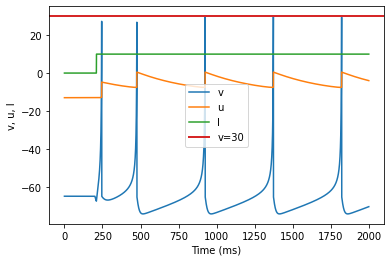

In [185]:
model(d=8)

### 4.1.2. Intrinsically Bursting (IB)

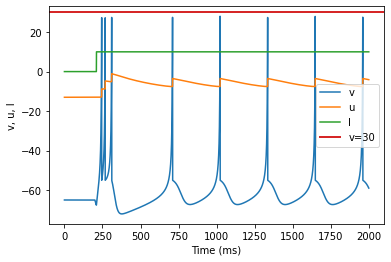

In [186]:
model(c=-55, d=4)

### 4.1.3. Chattering (CH)

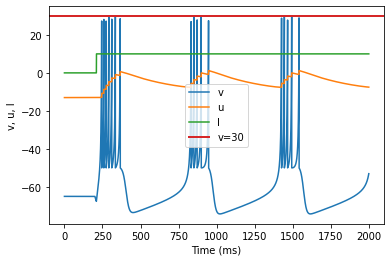

In [187]:
model(c=-50)

## 4.2. Inhibitory

### 4.2.1. Fast Spiking (FS)

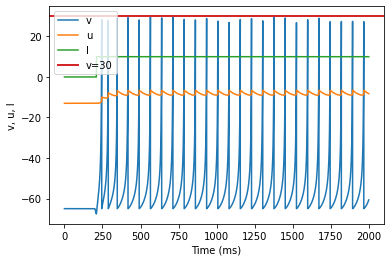

In [188]:
model(a=0.1)

### 4.2.2. Low-Thershold Spiking (LTS)

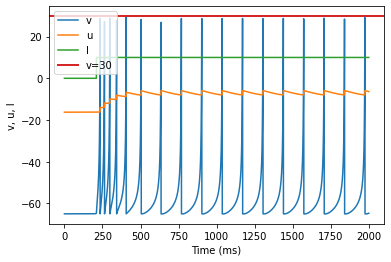

In [189]:
model(b=0.25)

## 4.3. Others
These are not working as expected

### 4.3.1 Thalamo-Cortical (TC)

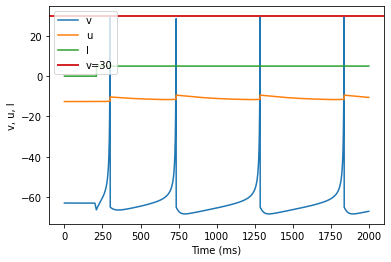

In [191]:
model(fI='int(t>200*ms)*5', V=-63)

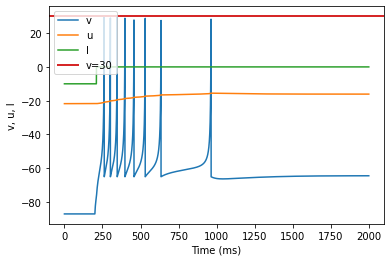

In [192]:
model(b=0.25, d=0.05, fI='int(t<=200*ms)*-10', V=-87)

### 4.3.2 Resonator (RZ)

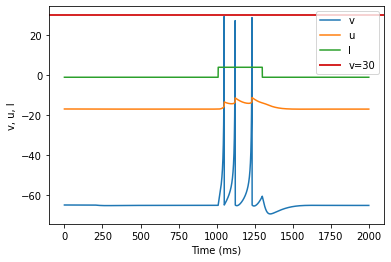

In [193]:
# The resonator is not working as intended
model(a=0.1, b=0.26, fI='int(t>200*ms)*-1 + int(t<=200*ms)*-1 + int(t>1000*ms and t<1300*ms)*5')

# 5. Neuron Features
https://www.izhikevich.org/publications/whichmod.htm

https://www.izhikevich.org/publications/figure1.m

Note: All the durations have been multiplied by 10 (one 0 added) to obtain complete images. Maybe multiplying by 5 or less is enough but. For now we do it like this to keep the original values.

Some of the features are not working correctly because they requires changing the model.

<figure>
  <img src="Features.gif" alt="Neuron Features">
  <figcaption>Figure 3. Neuron Features. Electronic version of the figure and reproduction permissions are freely available at <a href="http://www.izhikevich.com">http://www.izhikevich.com</a></figcaption>
</figure>

## 5.1. (A) Tonic Spiking

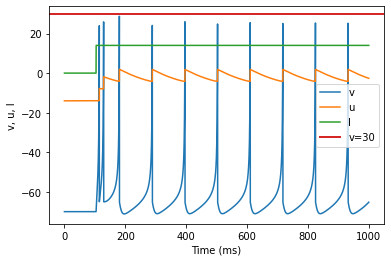

In [194]:
model(d=6, fI='int(t>100*ms)*14', V=-70, tau=1/0.25, duration=1000)

## 5.2. (B) Phasic Spiking

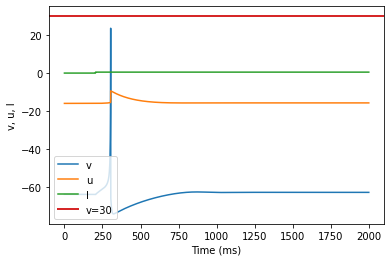

In [195]:
model(b=0.25, d=6, fI='int(t>200*ms)*0.5', V=-64, tau=1/0.25, duration=2000)

## 5.3. (C) Tonic Bursting

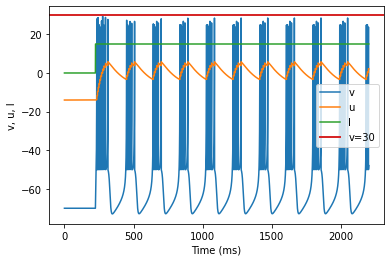

In [196]:
model(c=-50, fI='int(t>220*ms)*15', V=-70, tau=1/0.25, duration=2200)

## 5.4. (D) Phasic Bursting

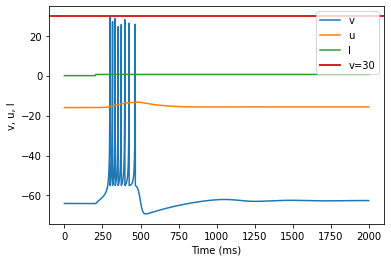

In [197]:
model(b=0.25, c=-55, d=0.05, fI='int(t>200*ms)*0.6', V=-64, tau=1/0.2, duration=2000)

## 5.5. (E) Mixed Mode

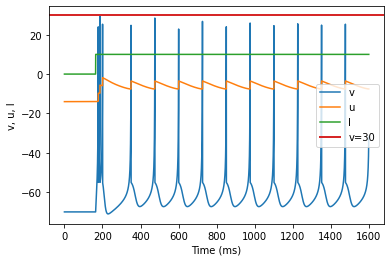

In [198]:
model(c=-55, d=4, fI='int(t>160*ms)*10', V=-70, tau=1/0.25, duration=1600)

## 5.6. (F) Spike Frequency Adaptation

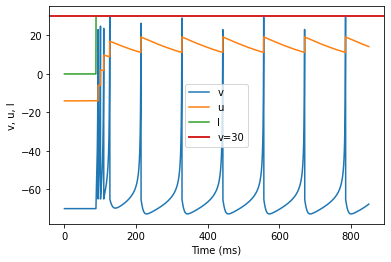

In [199]:
model(a=0.01, d=8, fI='int(t>85*ms)*30', V=-70, tau=1/0.25, duration=850)

## 5.7. (G) Class 1 Excitable


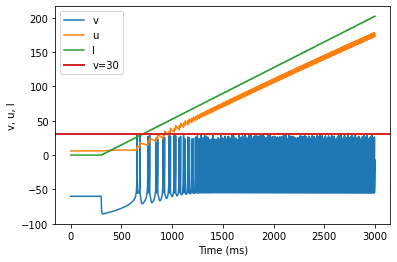

In [202]:
# V decreases at the start and that causes a delay in the spikes. The duration is too high and I increases too much
model(b=-0.1, c=-55, d=6, fI='int(t>300*ms)*0.075*(t/ms-300)', V=-60, tau=1/0.25, duration=3000)

## 5.8. (H) Class 2 Excitable

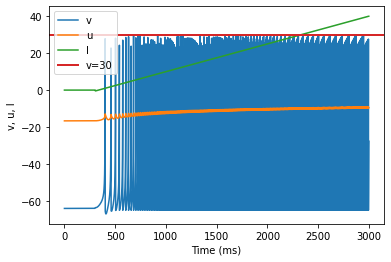

In [203]:
# The duration is too high and I increases too much
model(a=0.2, b=0.26, d=0, fI='int(t>300*ms)*(-0.5+0.015*(t/ms-300))', V=-64, tau=1/0.25, duration=3000)

## 5.9. (I) Spike Latency

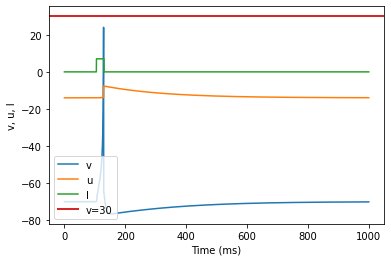

In [204]:
# There is not any spike latency
model(d=6, fI='int(t>100*ms and t<130*ms)*7.04', V=-70, tau=1/0.2, duration=1000)

## 5.10. (J) Subthreshold Oscillations

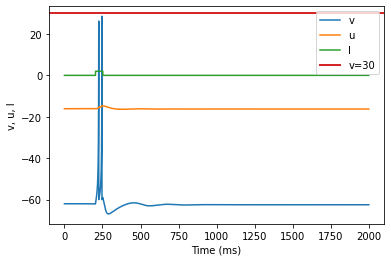

In [205]:
model(a=0.05, b=0.26, c=-60, d=0, fI='int(t>200*ms and t<250*ms)*2', V=-62, tau=1/0.25, duration=2000)

## 5.21. (U) Chaos

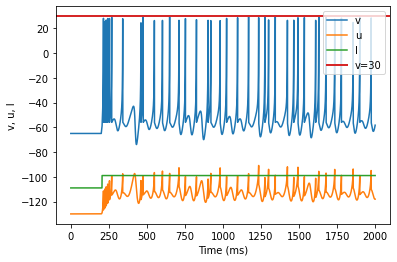

In [206]:
model(a=0.2, b=2, c=-56, d=-16, fI='int(t>200*ms)*-99 + int(t<=200*ms)*-109', tau=1/0.2, duration=2000)

# 6. Defining the simulation
https://www.izhikevich.org/publications/net.m

<figure>
  <img src="simulation.png" alt="Simulation">
  <figcaption>Figure 3. Simulation</figcaption>
</figure>

In [23]:
def simulation(Ne=800, Ni=200, tau=1, duration=1000):
    
    # Variables:
        # Ne: excitatory neurons quantity.
        # Ni: inhibitory neurons quantity.
        # tau: dv/dt and du/dt equations correspond to the change in a concrete time interval 
        #      that variables v and u suffer. This concrete time interval is defined by the value tau.
        # duration: defines the duration of the simulation.
            
    tau = tau*ms
    duration = duration*ms
    
    # Two behaviour differential equations:
    #    1) dv/dt: represents the membrane potential evolution during time.
    #    2) du/dt: represents the membrane recovery variable evolution during time.
    
    # Independient variables:
    #    1) I: represents the input current.
    #    2) v: represents the membrane potential of the neuron.
    #    3) u: represents a membrane recovery variable which provides negative feedback to v. This feedback
    #          is caused due to activation of K+ ionic currents and inactivation of Na+ ionic currents.
    #    4) tau: time interval
    #    5) a: describes the time scale of the recovery variable u.
    #    6) b: describes the sensitivity of the recovery variable u to the subthreshold fluctuations
    #          of the membrane potential v.
    #    7) c: describes the after-spike reset value of the membrane potential v.
    #    8) d: describes after-spike reset of the recovery variable u.
    
    eqs = '''
    dv/dt = (0.04*v**2+5*v+140-u+I)/tau : 1
    du/dt = (a*(b*v-u))/tau : 1
    I : 1
    a : 1
    b : 1
    c : 1
    d : 1
    '''
    
    # Excitatory neurons group network. Quantity of Ne (800)
    Ge = NeuronGroup(Ne, eqs, threshold='v>=30', reset='v=c; u+=d', method='euler')
    # Inhibitory neurons group network. Quantity of Ni (200)
    Gi = NeuronGroup(Ni, eqs, threshold='v>=30', reset='v=c; u+=d', method='euler')
    
    # Initial values of excitatory neurons parameters a, b, c, d, v and u 
    Ge.a = 0.02
    Ge.b = 0.2
    Ge.c = '-65+15*rand()**2'
    Ge.d = '8-6*rand()**2'
    Ge.v = -65
    Ge.u = Ge.b*-65
    # Initial values of inhibitory neurons parameters a, b, c, d, v and u 
    Gi.a = '0.02+0.08*rand()'
    Gi.b = '0.25-0.05*rand()'
    Gi.c = -65
    Gi.d = 2
    Gi.v = -65
    Gi.u = Gi.b*-65
    
    # Creating synaptical connections between neurons. 4 types of connections:
    #    1) See: a group of excitatory neurons where connections are given by excitatory-excitatory relations
    #    2) Sei: a group of excitatory and inhibitory neurons where connections are given by 
    #             excitatory->inhibitory relations.
    #    3) Sie: a group of excitatory and inhibitory neurons where connections are given by 
    #             inhibitory->excitatory relations.
    #    4) Sii: a group of inhibitory neurons where connections are given by inhibitory-inhibitory relations.
    
    See = Synapses(Ge, Ge, 'w : 1', on_pre='I_post += w')
    See.connect()
    See.w = '0.5*rand()'
    
    Sei = Synapses(Ge, Gi, 'w : 1', on_pre='I_post += w')
    Sei.connect()
    Sei.w = '0.5*rand()'
    
    Sie = Synapses(Gi, Ge, 'w : 1', on_pre='I_post += w')
    Sie.connect()
    Sie.w = '-rand()'
    
    Sii = Synapses(Gi, Gi, 'w : 1', on_pre='I_post += w')
    Sii.connect()
    Sii.w = '-rand()'
    
    # Creating monitors that records each NeuronGroup values in time
    Me = StateMonitor(Ge, 'v', record=True)
    Mi = StateMonitor(Gi, 'v', record=True)
   
    # Creating monitors that records each NeuronGroup spikes times
    Se = SpikeMonitor(Ge)
    Si = SpikeMonitor(Gi)
    
    # Compute I randomly with normal distribution in each time step
    Ge.run_regularly('I = 5*randn()', dt=tau)
    Gi.run_regularly('I = 2*randn()', dt=tau)

    # Run the model for a time defined by duration variable
    run(duration)
   
    # Plotting
    figure(figsize=(20, 20))
    # Plot numbers of spiking neurons
    subplot(2,1,1)
    plot(Se.t/ms, Se.i, '.k', ms=3, c='C0')
    plot(Si.t/ms, Si.i+Ne, '.k', ms=3, c='C1')
    axhline(Ne, ls='-', c='C2', lw=2, label='Ne')
    xlim(0, duration/ms)
    ylim(0, Ne+Ni)
    xlabel('Time (ms)')
    ylabel('Neuron number')
    legend()
    # Plot spikes
    subplot(2,1,2)
    plot(Me.t/ms, Me.v.T, c='C0')
    plot(Mi.t/ms, Mi.v.T, c='C1')
    axhline(30, ls='-', c='C2', lw=2, label='v=30')
    xlim(0, duration/ms)
    xlabel('Time (ms)')
    ylabel('v')
    legend()

# 7. Running the simulation
The simulation takes some time, so changing the sliders does not have an immediate result

In [24]:
layout = ipw.Layout(width='100%')
style = {'description_width': 'initial'}
ipw.interact(simulation, 
             Ne=ipw.IntSlider(value=800, min=400, max=1200, step=10, continuous_update=False,
                             description="Ne: excitatory neurons quantity", style=style, layout=layout),
             Ni=ipw.IntSlider(value=200, min=100, max=300, step=10, continuous_update=False,
                             description="Ni: inhibitory neurons quantity", style=style, layout=layout),
             tau=ipw.FloatSlider(value=1, min=1, max=100, step=1, continuous_update=False,
                             description="tau: time resolution", style=style, layout=layout),
             duration=ipw.IntSlider(value=1000, min=100, max=10000, step=10, continuous_update=False,
                             description="duration: length of the simulation", style=style, layout=layout),
            );

interactive(children=(IntSlider(value=800, continuous_update=False, description='Ne: excitatory neurons quanti…